In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

In [25]:
# import some data to play with
iris = datasets.load_iris()

# para simplificar  e visualizar, pegando apenas as primeiras duas características...
X = iris.data[:, :2]
y = iris.target


#mas já aprendemos a fazer melhor, não??


In [37]:
n_components = 2
print( "Extraindo %d componentes das %d amostras" % (n_components, len(y)) )

pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(iris.data)

X = pca.transform(iris.data)
print('Mantida %5.2f%% da informação do conjunto inicial de dados'%(sum(pca.explained_variance_ratio_)*100))




Extraindo 2 componentes das 150 amostras
Mantidas 97.77% da informação do conjunto inicial de dados


In [30]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

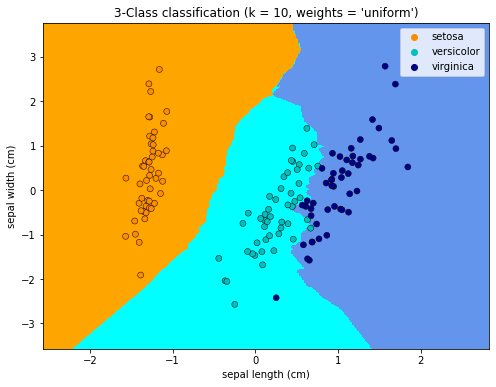

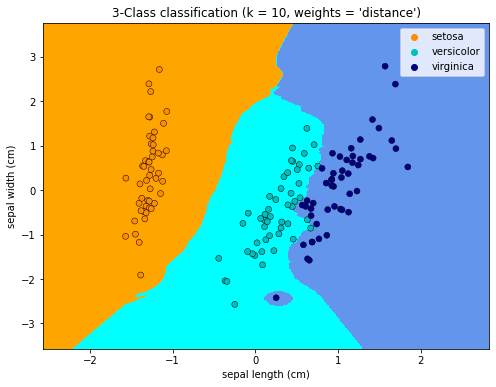

In [34]:
n_neighbors = 10
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()